### Load the Iris dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='species')


### Display the first few rows of the dataset

In [2]:

print("First few rows of the dataset:")
print(X.head())


First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


###  Add target to the dataset for better visualization

In [3]:

data_with_target = X.copy()
data_with_target['species'] = y


###  Check for missing values

In [4]:

print("\nMissing values in the dataset:")
print(data_with_target.isnull().sum())



Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


### Basic statistical summary

In [5]:

print("\nStatistical summary:")
print(X.describe())



Statistical summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


### Count plot of target classes

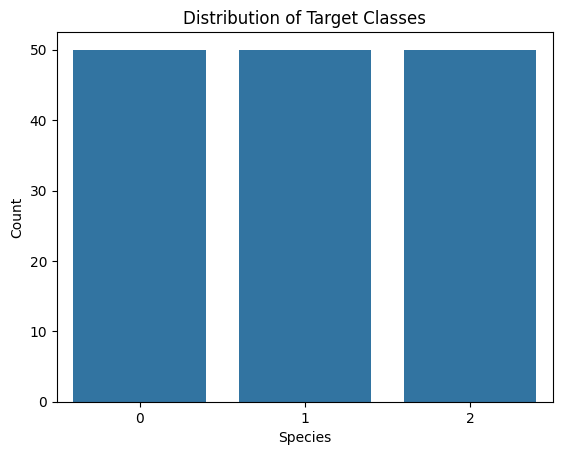

In [6]:

sns.countplot(x=y)
plt.title("Distribution of Target Classes")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


### Correlation heatmap

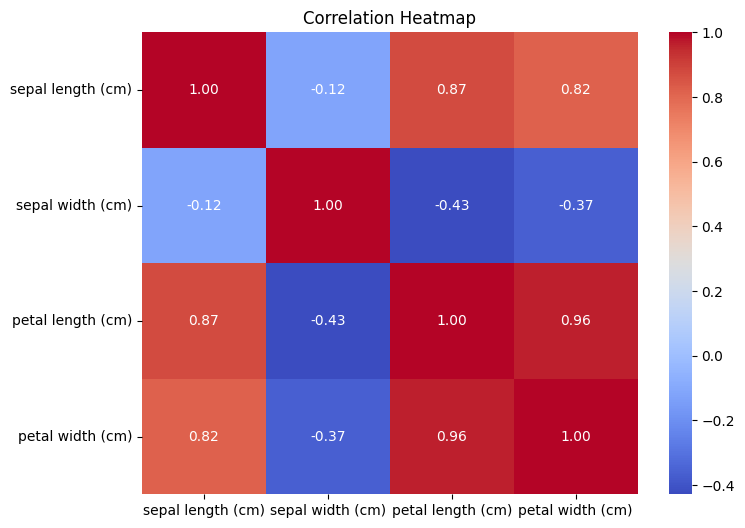

In [8]:

plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Split dataset into training and testing sets

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Initialize Decision Tree Classifier

In [10]:

clf = DecisionTreeClassifier(random_state=42)


###  Train the model

In [11]:

clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Visualize the decision tree

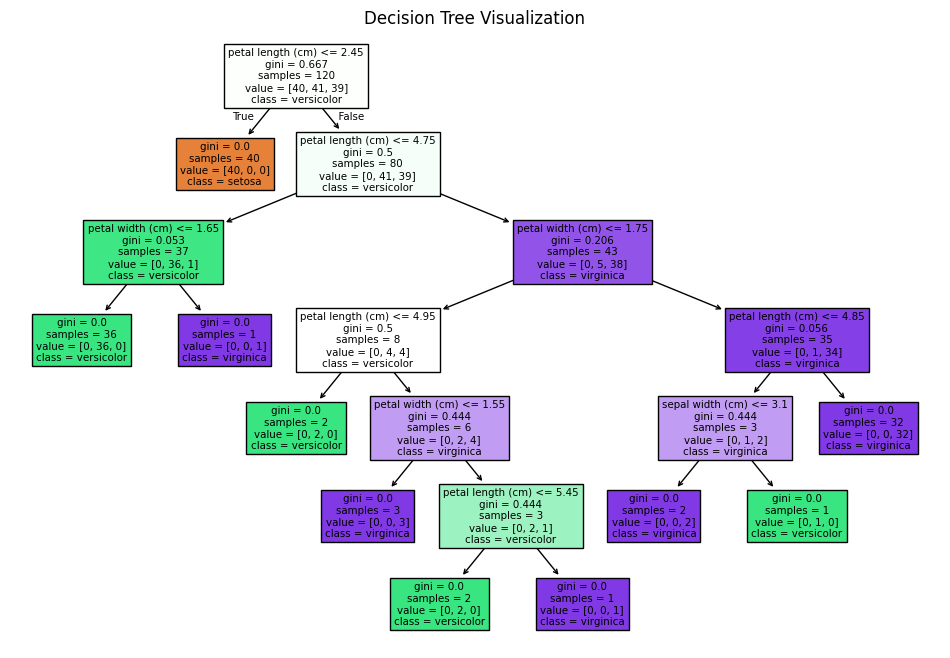

In [12]:

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


### Predictions on test data

In [13]:

y_pred = clf.predict(X_test)


###  Evaluate model performance

In [14]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Confusion matrix

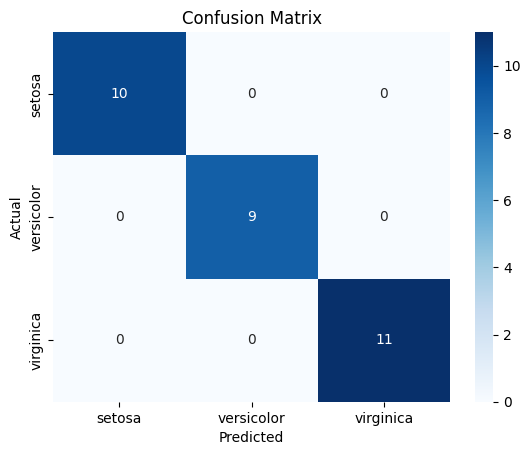

In [15]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Accuracy score

In [16]:

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 100.00%
